In [1]:
import torch
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt

In [6]:
# Load RealVisXL pipeline from Hugging Face model hub
pipe = DiffusionPipeline.from_pretrained(
    "SG161222/RealVisXL_V3.0",  # model repo id
    torch_dtype=torch.float16,  # Use half-precision to reduce memory usage
    use_safetensors=True,       # load weights using the safer/faster safetensors format if available
)

# Move the pipeline to the GPU for inference
pipe = pipe.to("cuda")

# Enable attention slicing to reduce peak memory usage during generation
pipe.enable_attention_slicing()

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
prompt = """" Light-medium skintone male, oval face, neutral expression.
Short dark brown thick hair, straight hairline, smooth forehead.
Short well-groomed beard. Medium round dark brown eyes, average lashes.
Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip.
Strong jawline, defined chin, average ears, no scars.

"""

image = pipe(prompt).images[0]
image.save("generated_face_with_formated_prompt.png")


Token indices sequence length is longer than the specified maximum sequence length for this model (80 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['no scars.']
Token indices sequence length is longer than the specified maximum sequence length for this model (80 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['no scars.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars.']


  0%|          | 0/50 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(767.5), np.float64(767.5), np.float64(-0.5))

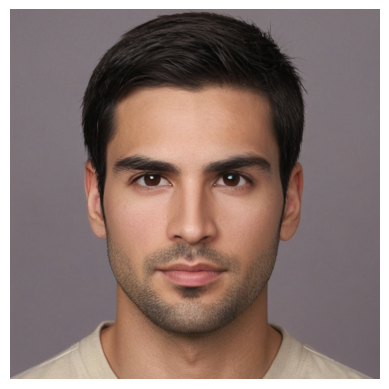

In [5]:


prompt = """ Light-medium skintone male, oval face, neutral expression.
Short dark brown thick hair, straight hairline, smooth forehead.
Short well-groomed beard. Medium round dark brown eyes, average lashes.
Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip.
Strong jawline, defined chin, average ears, no scars.

"""

# Generate a smaller image to reduce memory usage
image = pipe(prompt, height=768, width=768).images[0]
image.save("generated_face_with_formated_prompt.png")
plt.imshow(image)
plt.axis('off')

Token indices sequence length is longer than the specified maximum sequence length for this model (93 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars. mugshot style, plain grey background, front - facing, studio lighting.']


Generating image for prompt 1:


Token indices sequence length is longer than the specified maximum sequence length for this model (93 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['scars. mugshot style, plain grey background, front - facing, studio lighting.']


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_realvisxl_mugshot_1.png


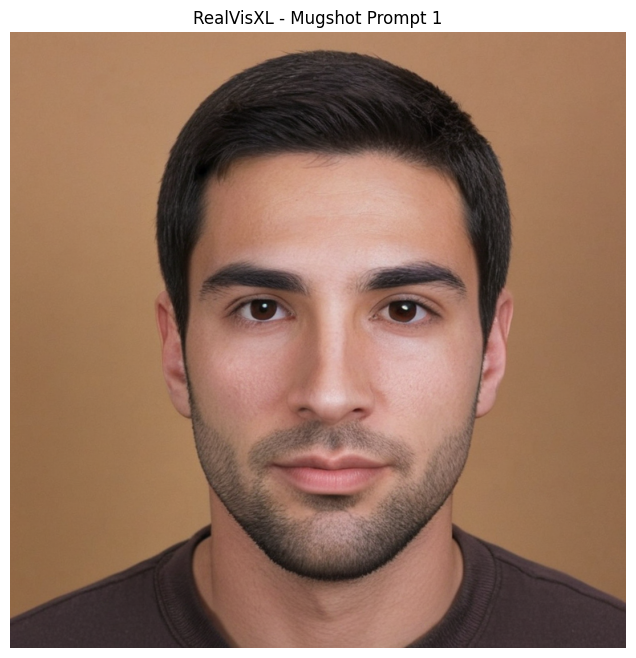

Generating image for prompt 2:


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_realvisxl_mugshot_2.png


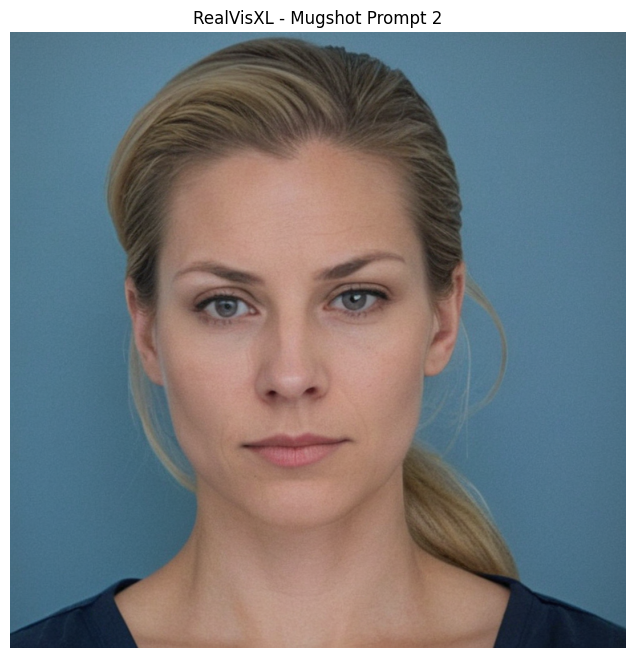

Generating image for prompt 3:


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_realvisxl_mugshot_3.png


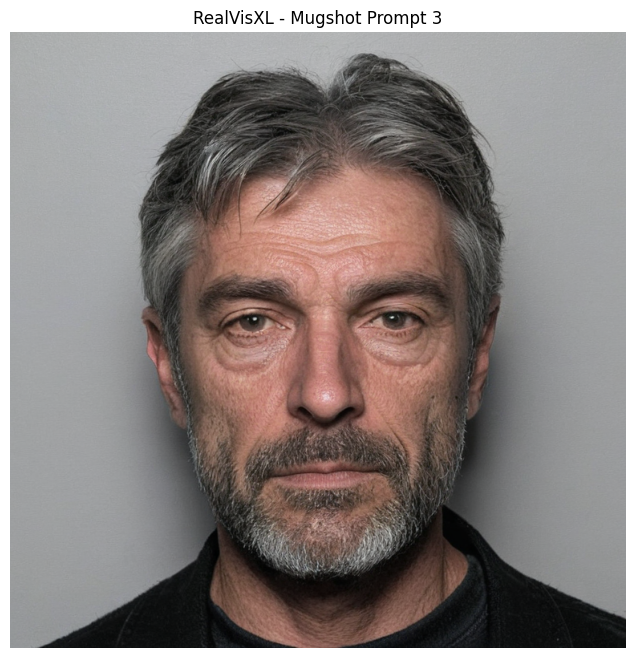

Generating image for prompt 4:


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_realvisxl_mugshot_4.png


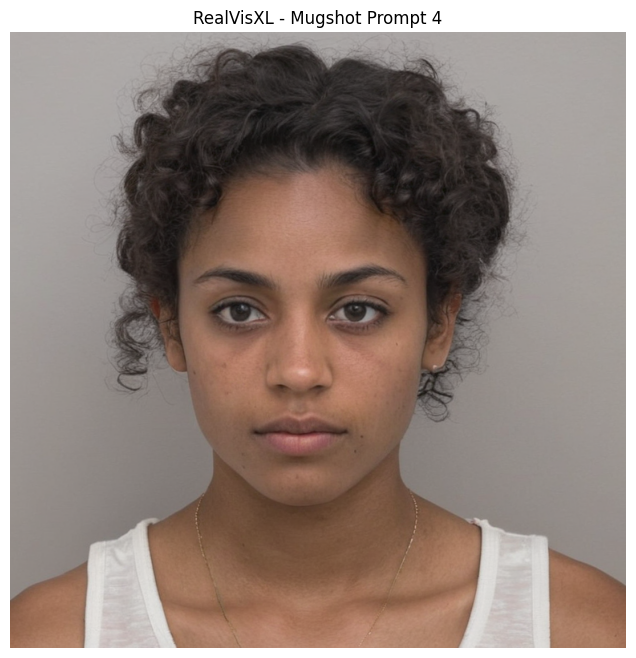

Generating image for prompt 5:


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_realvisxl_mugshot_5.png


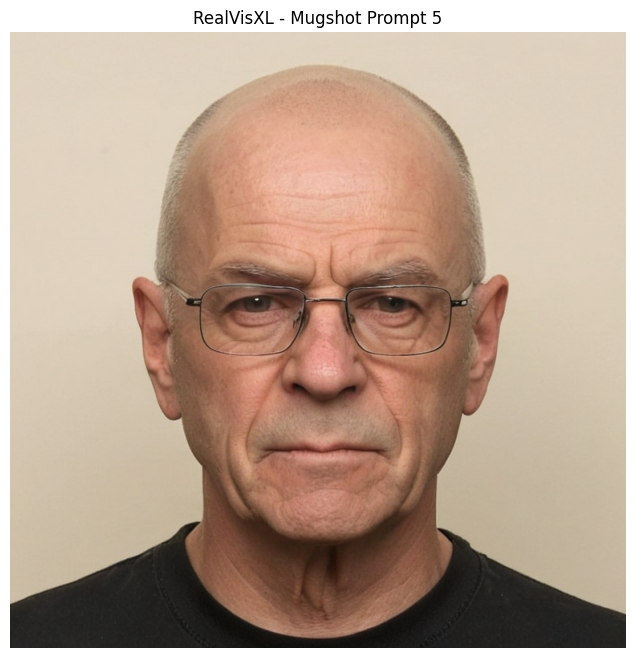

In [7]:
import matplotlib.pyplot as plt

prompts = [
    "Light-medium skintone male, oval face, neutral expression. Short dark brown thick hair, straight hairline, smooth forehead. Short well-groomed beard. Medium round dark brown eyes, average lashes. Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip. Strong jawline, defined chin, average ears, no scars. Mugshot style, plain grey background, front-facing, studio lighting.",
    "Female, early 30s, neutral expression, medium length blonde hair pulled back, light makeup, plain blue background, front-facing, professional mugshot style.",
    "Male, late 40s, slightly wrinkled face, short grey hair, stubble beard, dark clothing, white background, straight on, mugshot photography.",
    "Female, mid-20s, dark skin tone, natural curly black hair, no visible jewelry, neutral expression, plain white wall background, clear focus, mugshot.",
    "Male, elderly, bald head with some grey hair on sides, glasses, slight frown, simple black t-shirt, beige background, front-view, mugshot camera style."
]

for i, p in enumerate(prompts):
    print(f"Generating image for prompt {i+1}:")
    # Generate a smaller image to reduce memory usage, similar to previous successful runs
    image = pipe(p, height=768, width=768).images[0]
    filename = f"generated_image_realvisxl_mugshot_{i+1}.png"
    image.save(filename)
    print(f"Image saved as {filename}")

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"RealVisXL - Mugshot Prompt {i+1}")
    plt.axis('off')
    plt.show()

everything looks good oveall